## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 確認硬體資源
# !nvidia-smi

In [13]:
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import cifar10
# Try to enable GPU (optional)

In [3]:
train, test = cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x  = (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0))
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [10]:
x_train.shape

(50000, 3072)

In [16]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 128, 128, 64, 32]):
    
    model = Sequential()
    model.add(Dense(units = input_shape[1] ,input_dim = input_shape[1], 
                    kernel_initializer = 'normal', activation = 'relu',name = 'input'))
    
    for i, n_units in enumerate(num_neurons):
        model.add(Dense(units=n_units, kernel_initializer='normal', activation='relu',
                        name="hidden_layer"+str(i+1)))  
           
                
    model.add(Dense(units=output_units,kernel_initializer='normal', activation='softmax',name='output'))

    return(model)

In [17]:
## Build up the model
model = build_mlp(input_shape=x_train.shape)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 3072)              9440256   
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer6 (Dense)        (None, 64)                8256      
__________

In [18]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [19]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [20]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 79s 2ms/step - loss: 2.0221 - acc: 0.2282 - val_loss: 1.9351 - val_acc: 0.2636
Epoch 2/100
50000/50000 [==============================] - 80s 2ms/step - loss: 1.8557 - acc: 0.2998 - val_loss: 1.8281 - val_acc: 0.3116
Epoch 3/100
50000/50000 [==============================] - 75s 1ms/step - loss: 1.7462 - acc: 0.3574 - val_loss: 1.6941 - val_acc: 0.3839
Epoch 4/100
50000/50000 [==============================] - 74s 1ms/step - loss: 1.6543 - acc: 0.4004 - val_loss: 1.6743 - val_acc: 0.3900
Epoch 5/100
50000/50000 [==============================] - 73s 1ms/step - loss: 1.5936 - acc: 0.4235 - val_loss: 1.5463 - val_acc: 0.4404
Epoch 6/100
50000/50000 [==============================] - 74s 1ms/step - loss: 1.5424 - acc: 0.4424 - val_loss: 1.5148 - val_acc: 0.4566
Epoch 7/100
50000/50000 [==============================] - 74s 1ms/step - 

50000/50000 [==============================] - 68s 1ms/step - loss: 0.3365 - acc: 0.8825 - val_loss: 2.5346 - val_acc: 0.5090
Epoch 58/100
50000/50000 [==============================] - 68s 1ms/step - loss: 0.3225 - acc: 0.8868 - val_loss: 2.4947 - val_acc: 0.5136
Epoch 59/100
50000/50000 [==============================] - 68s 1ms/step - loss: 0.3132 - acc: 0.8905 - val_loss: 2.5344 - val_acc: 0.5220
Epoch 60/100
50000/50000 [==============================] - 68s 1ms/step - loss: 0.2969 - acc: 0.8963 - val_loss: 2.6599 - val_acc: 0.5260
Epoch 61/100
50000/50000 [==============================] - 73s 1ms/step - loss: 0.3012 - acc: 0.8960 - val_loss: 2.4301 - val_acc: 0.5155
Epoch 62/100
50000/50000 [==============================] - 72s 1ms/step - loss: 0.2829 - acc: 0.9010 - val_loss: 2.6223 - val_acc: 0.5165
Epoch 63/100
50000/50000 [==============================] - 72s 1ms/step - loss: 0.2706 - acc: 0.9049 - val_loss: 2.7674 - val_acc: 0.5154
Epoch 64/100
50000/50000 [==============

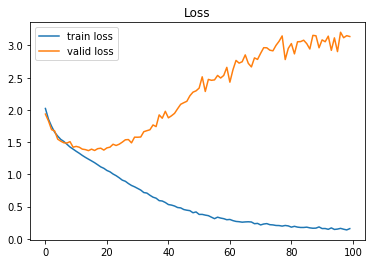

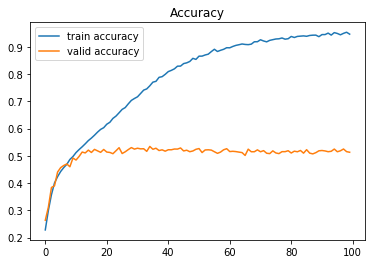

In [22]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()